## Load the daset

In [15]:
import pandas as pd


In [16]:
#treat '?' as null when loading the CSV
df = pd.read_csv('../dataset/adultcensusincome.csv', na_values=['?'])
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K


In [17]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Check for null values and ? in any columns and handle those values. Check the distribution of target variable income and identify if the dataset is balanced

In [18]:
#nulll values and class distribution
df.isnull().sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [19]:
df['income'].value_counts(normalize=True)


income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64

In [20]:
#remove null values
df_cleaned = df.dropna()
# Check the distribution of the target variable after cleaning
df_cleaned['income'].value_counts(normalize=True)


income
<=50K    0.751078
>50K     0.248922
Name: proportion, dtype: float64

### Univariate Analysis

- **Barplot for Income:**  
    Visualizes the distribution of the target variable `income` to check class balance.

- **Distribution Plot for Age:**  
    Shows the age distribution in the dataset, highlighting skewness or outliers.

- **Barplot for Education:**  
    Displays the frequency of each education category.

- **Barplot for Years of Education (`education.num`):**  
    Illustrates how many years of education individuals have completed.

- **Pie Chart for Marital Status:**  
    Represents the proportion of each marital status category.

Plots are generated using `seaborn` and `matplotlib` for the cleaned dataset (`df_cleaned`).

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt


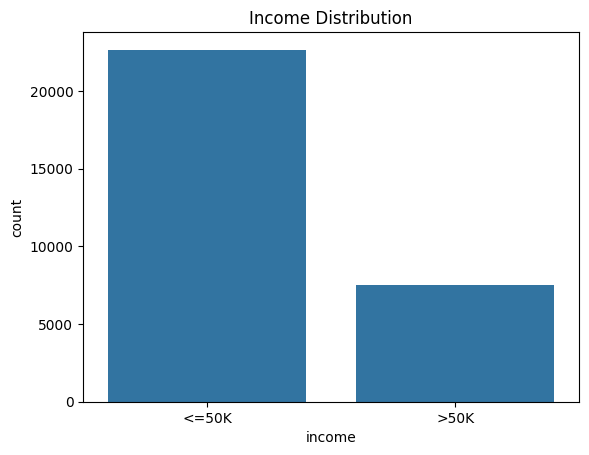

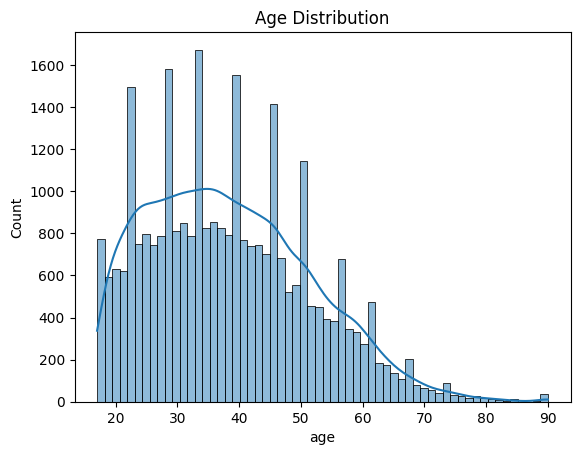

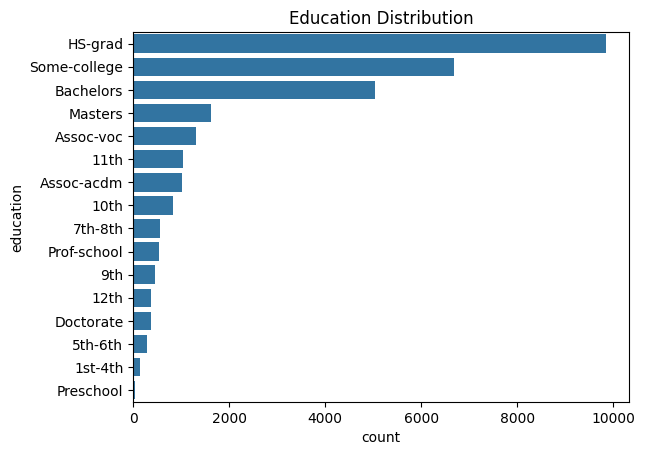

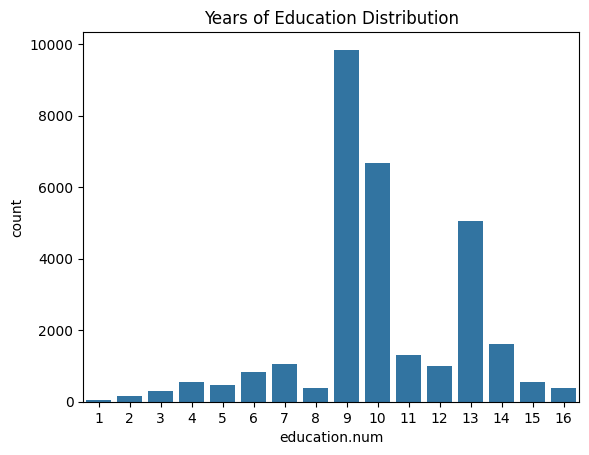

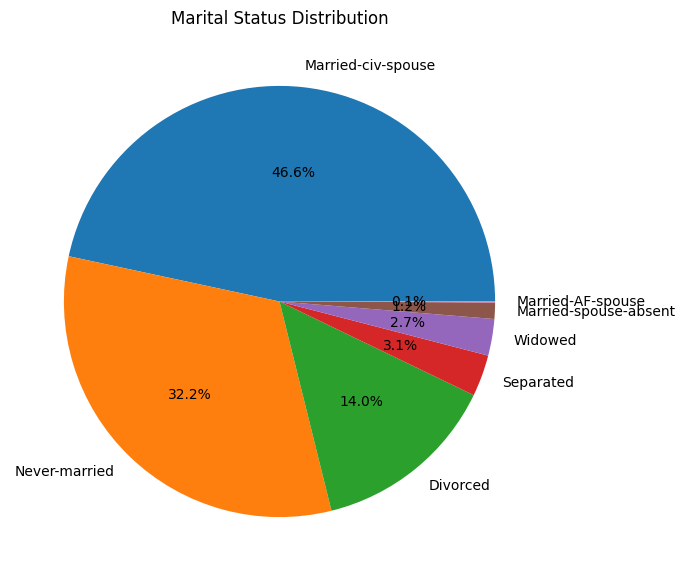

In [22]:

# Barplot for column income
sns.countplot(x='income', data=df_cleaned)
plt.title('Income Distribution')
plt.show()

# Distribution plot for column age
sns.histplot(df_cleaned['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Barplot for column education
sns.countplot(y='education', data=df_cleaned, order=df_cleaned['education'].value_counts().index)
plt.title('Education Distribution')
plt.show()

# Barplot for Years of Education (education.num)
sns.countplot(x='education.num', data=df_cleaned)
plt.title('Years of Education Distribution')
plt.show()

# Pie chart for Marital status
df_cleaned['marital.status'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(7, 7))
plt.title('Marital Status Distribution')
plt.ylabel('')
plt.show()

### Bivariate Analysis

#### 1. Countplots of Income Across Key Columns

- **Income vs Age:**  
    Shows how income distribution varies across different age groups.

- **Income vs Education:**  
    Visualizes the relationship between education level and income.

- **Income vs Marital Status:**  
    Highlights how marital status relates to income categories.

- **Income vs Sex:**  
    Displays income distribution across genders.

Plots are generated using `seaborn` for the cleaned dataset (`df_cleaned`).

#### 2. Heatmap of Data Correlation

- A correlation heatmap is drawn for numerical columns in `df_cleaned`.
- The correlation of each column with `income` is calculated by encoding `income` as binary (`<=50K` as 0, `>50K` as 1).
- Columns most highly correlated with income are identified and discussed.

**Note:**  
Income is an object type, so it is first converted to a numeric variable for correlation analysis.

---

**Columns most highly correlated with income:**  
Typically, `education.num`, `age`, `capital.gain`, and `hours.per.week` show the strongest correlation with income.  
- **education.num:** Higher education years are positively correlated with higher income.
- **capital.gain:** Individuals with higher capital gains tend to have higher income.
- **age:** Older individuals are more likely to have higher income, but the relationship may not be strictly linear.
- **hours.per.week:** Working more hours per week is weakly positively correlated with higher income.

These relationships can be visually confirmed in the heatmap and countplots.

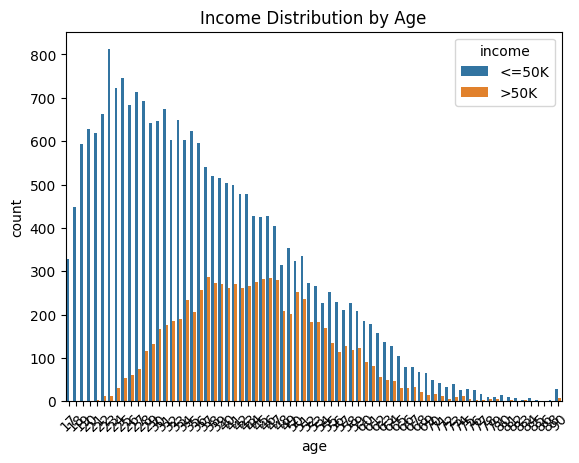

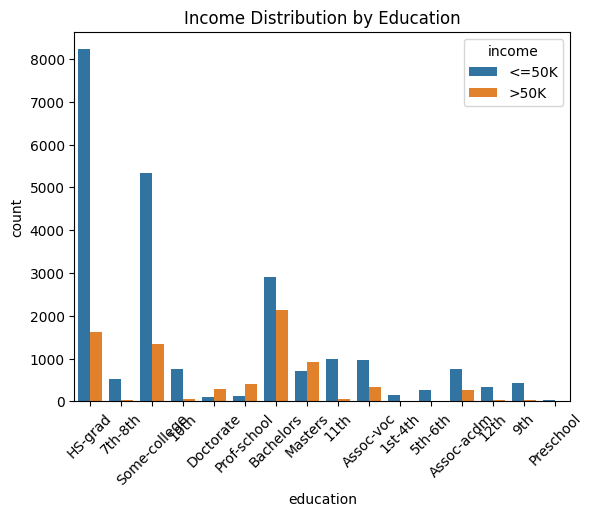

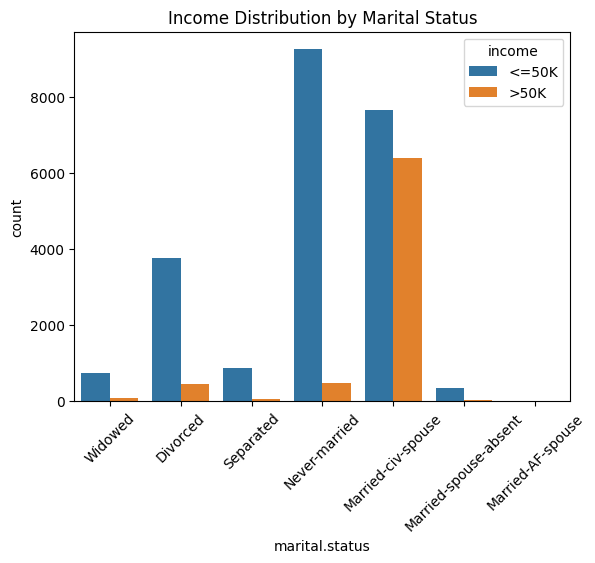

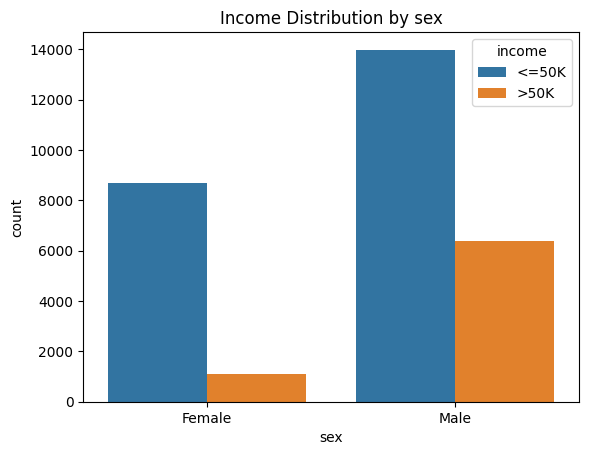

In [25]:
# Perform the following Bivariate analysis
# Create a countplot of income across columns age, education, marital status, sex
sns.countplot(x='age', hue='income',    
               data=df_cleaned)
plt.title('Income Distribution by Age')
plt.xticks(rotation=45)
plt.show()
sns.countplot(x='education', hue='income', data=df_cleaned)
plt.xticks(rotation=45)
plt.title('Income Distribution by Education')
plt.show()
sns.countplot(x='marital.status', hue='income', data=df_cleaned)
plt.xticks(rotation=45)
plt.title('Income Distribution by Marital Status')
plt.show()
sns.countplot(x='sex', hue='income', data=df_cleaned)
plt.title('Income Distribution by sex')
plt.show()


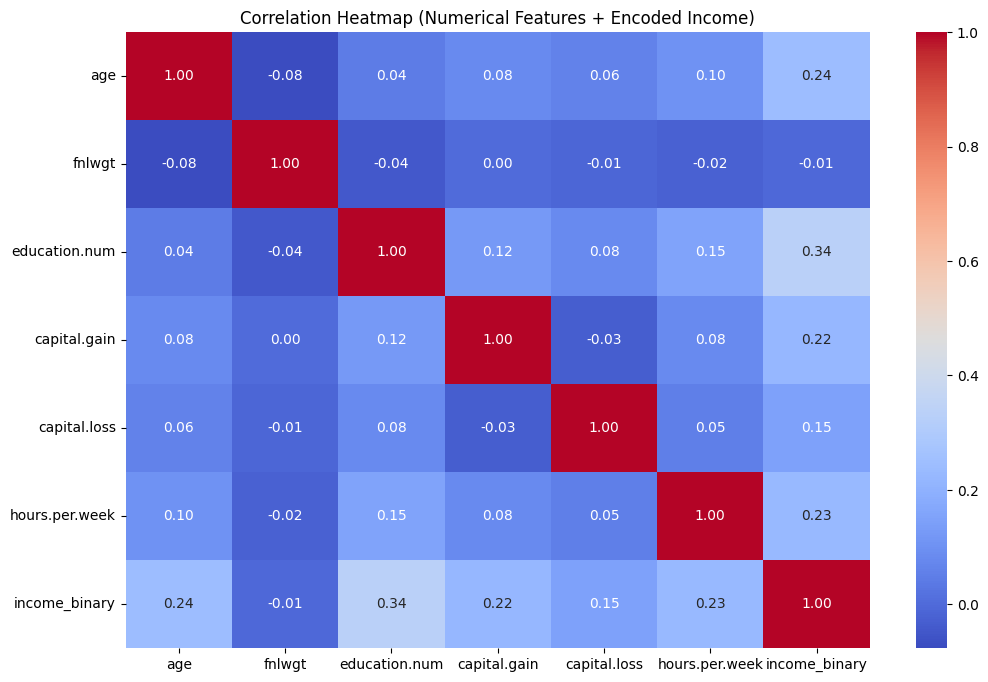

Top correlations with income_binary:
education.num     0.335286
age               0.241998
hours.per.week    0.229480
capital.gain      0.221196
capital.loss      0.150053
fnlwgt           -0.008957
Name: income_binary, dtype: float64


In [26]:
# Encode 'income' as binary: <=50K as 0, >50K as 1
df_corr = df_cleaned.copy()
df_corr['income_binary'] = df_corr['income'].map({'<=50K': 0, '>50K': 1})

# Select only numerical columns for correlation analysis
numerical_cols = df_corr.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Add the encoded income column
if 'income_binary' not in numerical_cols:
    numerical_cols.append('income_binary')

# Compute correlation matrix
corr_matrix = df_corr[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Features + Encoded Income)')
plt.show()

# Show top correlations with income
corr_with_income = corr_matrix['income_binary'].drop('income_binary').sort_values(ascending=False)
print("Top correlations with income_binary:")
print(corr_with_income)

### Preparing the Dataset for Modeling

1. **Label Encoding Categorical Columns:**  
    All categorical columns are converted to numeric using label encoding, ensuring compatibility with machine learning algorithms.

2. **Defining Features and Target:**  
    - **Independent Variables (`X`):** All columns except the target variable `income`.
    - **Dependent Variable (`Y`):** The target variable `income`, encoded as binary (`<=50K` as 0, `>50K` as 1).

3. **Feature Scaling:**  
    StandardScaler is applied to all feature columns to normalize the data, improving model performance.

4. **Handling Class Imbalance:**  
    The imbalance in the target variable is addressed using techniques such as SMOTE or RandomOverSampler, which balance the classes by oversampling the minority class.

5. **Train-Test Split:**  
    The dataset is split into training and testing sets in an 80:20 ratio, with `random_state=42` for reproducibility.

---

**Workflow Steps:**
- Encode categorical columns using LabelEncoder.
- Separate features (`X`) and target (`Y`).
- Apply StandardScaler to `X`.
- Balance the dataset using SMOTE or RandomOverSampler.
- Split the balanced data into training and testing sets (80:20, random_state=42).

This process ensures the dataset is ready for building robust and unbiased machine learning models.

In [28]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns in df_cleaned
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('income')  # We'll encode income separately

# Create a copy for encoding
df_encoded = df_cleaned.copy()

# Apply LabelEncoder to each categorical column
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Encode the target variable 'income'
df_encoded['income'] = le.fit_transform(df_encoded['income'])

display(df_encoded.head())
display(df_cleaned.head())

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,2,132870,11,9,6,3,1,0,0,4356,18,38,0
3,54,2,140359,5,4,0,6,4,0,0,3900,40,38,0
4,41,2,264663,15,10,5,9,3,0,0,3900,40,38,0
5,34,2,216864,11,9,0,7,4,0,0,3770,45,38,0
6,38,2,150601,0,6,5,0,4,1,0,3770,40,38,0


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,Male,0,3770,40,United-States,<=50K


In [29]:
# Prepare independent variables X and dependent variable Y (Income)
X = df_encoded.drop('income', axis=1)
Y = df_encoded['income']

In [30]:
from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Create pipeline for scaling and SMOTE
pipeline = make_pipeline(
    StandardScaler(),
    SMOTE(random_state=42)
)

# Apply pipeline to features and target
X_resampled, Y_resampled = pipeline.fit_resample(X, Y)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42
)

### Data Modeling and Model Evaluation

- **Models Trained:**  
    - Logistic Regression  
    - K-Nearest Neighbors (KNN)  
    - Support Vector Machine (SVM)  
    - Naive Bayes  
    - Decision Tree  
    - Random Forest

- **Evaluation Metrics:**  
    - **Accuracy:** Measures the proportion of correct predictions.  
    - **F1 Score:** Harmonic mean of precision and recall, useful for imbalanced datasets.

- **Workflow:**  
    1. Train each classifier using the training set (`X_train`, `Y_train`).
    2. Predict on the test set (`X_test`).
    3. Calculate accuracy and F1 score for each model.
    4. Compare results and identify the best-performing model.

- **Outcome:**  
    The model with the highest F1 score and accuracy is selected as the best classifier for this dataset.  
    Results are summarized in a comparison table for easy interpretation.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    results.append({'Model': name, 'Accuracy': acc, 'F1 Score': f1})

# Display results
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
display(results_df)

best_model = results_df.iloc[0]
print(f"Best Model: {best_model['Model']} (Accuracy: {best_model['Accuracy']:.4f}, F1 Score: {best_model['F1 Score']:.4f})")

,Model,Accuracy,F1 Score
5,Random Forest,0.899470,0.900492
1,KNN,0.852130,0.861570
4,Decision Tree,0.851799,0.852044
2,SVM,0.834584,0.843152
0,Logistic Regression,0.759656,0.758108
3,Naive Bayes,0.694549,0.599073


Best Model: Random Forest (Accuracy: 0.8995, F1 Score: 0.9005)


: 